<a href="https://colab.research.google.com/github/MadhurGyani/ML/blob/main/HappyFaceAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U insightface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 72.6 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp310-cp310-linux_x86_64.whl size=1053978 sha256=f8efe61de6f2a47b71cab70dba3af709f263e6ae7c0741046e363bcc783618d5
  Stored in directory: /root/.cache/pip/wheels/e3/d0/80/e3773fb8b6d1cca87ea1d33d9b1f20a223a6493c896da249b5
Successfully built insightface


In [ ]:
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.7 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob


import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [ ]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id = 0,det_size=(640,640))

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:04<00:00, 59010.61KB/s]
/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


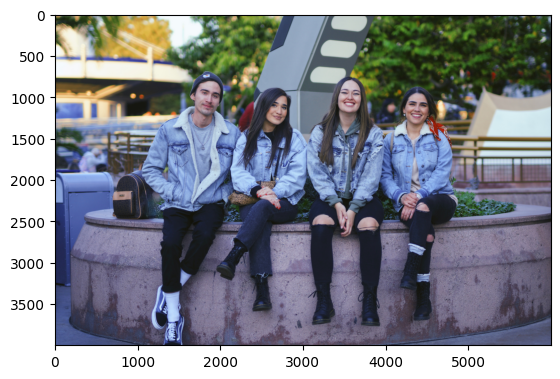

In [ ]:
xyz = '/content/fabian-centeno-AVywGKkAlD0-unsplash.jpg'
new = cv2.imread(xyz)

if new is not None:
    plt.imshow(new[:,:,::-1])  # Convert BGR to RGB
    plt.show()
else:
    print(f"Failed to load image '{xyz}'. Check the file path and format.")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
img=new

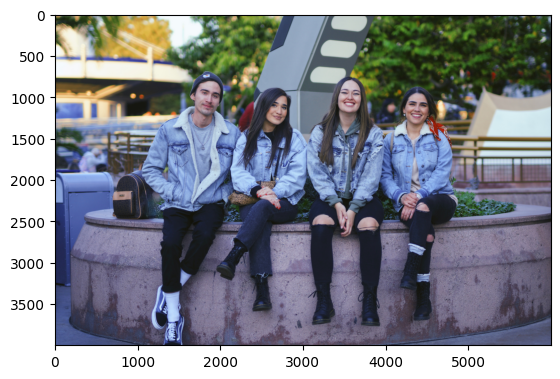

In [ ]:
#img = ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()

In [ ]:
faces = app.get(img)

In [ ]:
faces

[{'bbox': array([4234.9844,  947.0758, 4521.4707, 1327.7037], dtype=float32),
  'kps': array([[4323.2393, 1094.3988],
         [4455.429 , 1110.1589],
         [4389.7354, 1166.9275],
         [4317.9844, 1212.5835],
         [4439.0146, 1224.873 ]], dtype=float32),
  'det_score': 0.92425156,
  'landmark_3d_68': array([[ 4.22822412e+03,  1.09890271e+03,  1.95181961e+02],
         [ 4.22930322e+03,  1.13886853e+03,  1.85663437e+02],
         [ 4.22980176e+03,  1.17909131e+03,  1.72800217e+02],
         [ 4.23408984e+03,  1.21657361e+03,  1.52737228e+02],
         [ 4.24487500e+03,  1.24849780e+03,  1.17972359e+02],
         [ 4.26291162e+03,  1.27294714e+03,  9.05587769e+01],
         [ 4.28338525e+03,  1.29232202e+03,  6.72288589e+01],
         [ 4.30893311e+03,  1.30912317e+03,  3.70142555e+01],
         [ 4.35320947e+03,  1.32651526e+03,  1.75764122e+01],
         [ 4.39953906e+03,  1.32083557e+03,  4.05937500e+01],
         [ 4.43174609e+03,  1.30720789e+03,  7.61038666e+01],
      

In [ ]:
len(faces)

4

In [ ]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

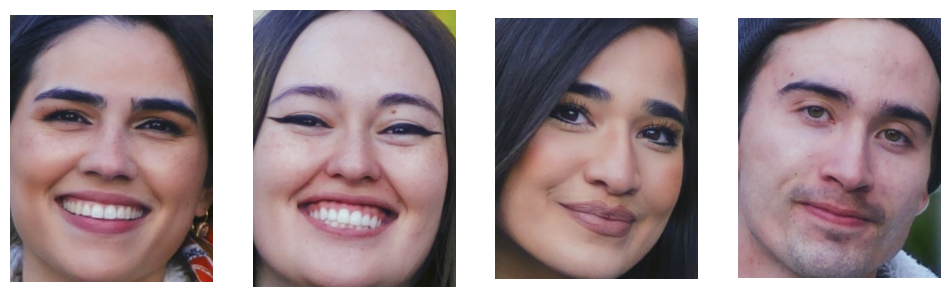

In [ ]:
fig, axs = plt.subplots (1, len(faces), figsize=(12, 5))
for i, face in enumerate(faces):
  bbox = face['bbox']
  bbox=[int (b) for b in bbox]
  axs[i].imshow(img [bbox [1]:bbox[3], bbox [0]: bbox [2],:: -1])
  axs[i].axis ('off')

In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 8.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=64cd199290cb620709e05c52f27ab2eb3cd14794c9e56b9588f74eb9832aaf73
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 15.5 MB/s eta 0:00:00


In [ ]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


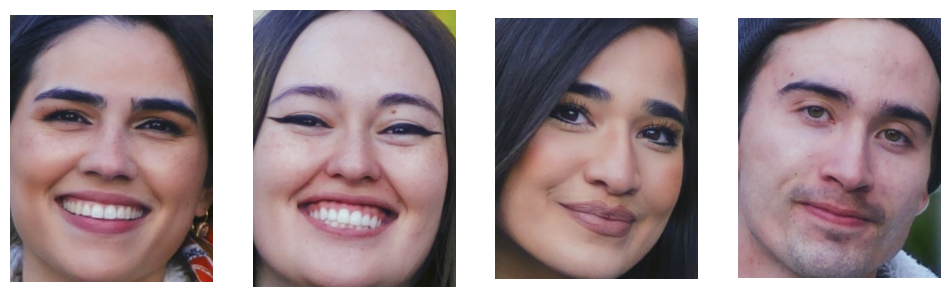

In [ ]:

faces_list = []  # Initialize an empty list to store the cropped faces

# Create a figure with subplots for each face
fig, axs = plt.subplots(1, len(faces), figsize=(12, 5))

# Iterate through the faces
for i, face in enumerate(faces):
    bbox = face['bbox']  # Get the bounding box of the face
    bbox = [int(b) for b in bbox]  # Convert bounding box coordinates to integers

    # Crop the face from the original image
    cropped_face = img[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1]

    # Store the cropped face in the list
    faces_list.append(cropped_face)

    # Display the cropped face in the current subplot
    axs[i].imshow(cropped_face)
    axs[i].axis('off')  # Turn off axis labels for better visualization

# Now 'faces_list' contains all the individual cropped faces

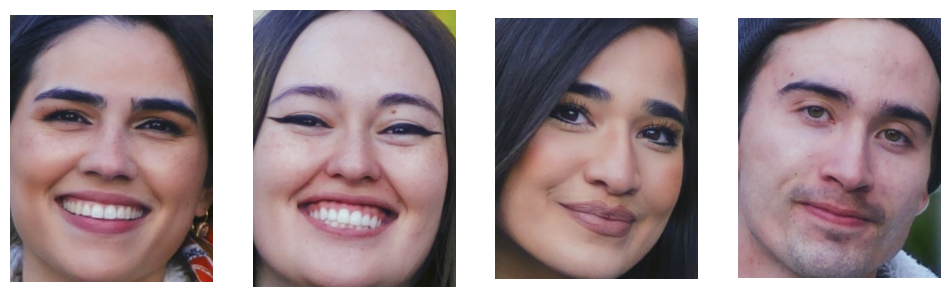

In [ ]:
fig, axs = plt.subplots(1, len(faces_list), figsize=(12, 5))

# Iterate through the faces in 'faces_list'
for i, face in enumerate(faces_list):
    axs[i].imshow(face)
    axs[i].axis('off')  # Turn off axis labels for better visualization

# Display all the stored faces
plt.show()

In [ ]:
# backends = ["opencv", "ssd", "mtcnn", "retinaface", "mediapipe"]

In [ ]:
# for i, face in enumerate(faces_list):
#    facce=DeepFace.extract_faces(face,target_size=(224, 224),detector_backend='opencv')

In [ ]:
# for i in range(len(faces_list)):
#     faces_list[i] = faces_list[i].astype(np.uint8)

# print(f"Sample pixel values: {faces_list[0][0, 0]}")


Sample pixel values: [78 51 30]


In [ ]:

# # Create subplots for each backend
# fig, axs = plt.subplots(2, 2, figsize=(15, 10))
# axs = axs.flatten()

# # Iterate through the faces in 'faces_list'
# for i, face in enumerate(faces_list):
#     print(face.dtype)
#     # Create a new set of subplots for each face
#     fig, axs = plt.subplots(2, 2, figsize=(15, 10))
#     axs = axs.flatten()

#     # Iterate through the backends
#     for j, backend in enumerate(backends):
#         try:
#             # Extract faces using the specified backend
#             extracted_faces = DeepFace.extract_faces(
#                 face, detector_backend=backend, enforce_detection=False
#             )

#             if len(extracted_faces) > 0:
#                 axs[j].imshow(extracted_faces[0])
#                 axs[j].set_title(backend)
#                 axs[j].axis('off')
#             else:
#                 axs[j].set_title(f"No face detected ({backend})")

#         except Exception as e:
#             print(f"Error with backend '{backend}': {str(e)}")

#     # Show the subplots for the current face
#     plt.show()

In [ ]:
# for i in range(len(faces_list)):
#     faces_list[i] = faces_list[i].astype(np.float32)

In [ ]:
# fig, axs = plt.subplots(len(backends), len(faces_list), figsize=(15, 10))

# # Iterate through the backends
# for i, backend in enumerate(backends):
#     # Iterate through the faces in 'faces_list'
#     for j, face in enumerate(faces_list):
#         print(face.dtype)
#         try:
#             # Extract faces using the specified backend
#             extracted_faces = DeepFace.extract_faces(
#                 face, detector_backend=backend, enforce_detection=False
#             )

#             if len(extracted_faces) > 0:
#                 axs[i, j].imshow(extracted_faces[0])
#                 axs[i, j].set_title(backend)
#                 axs[i, j].axis("off")
#             else:
#                 axs[i, j].set_title(f"No face detected ({backend})")

#         except Exception as e:
#             print(f"Error with backend '{backend}': {str(e)}")

# # Adjust subplot layout
# plt.tight_layout()

# # Show the subplots for all faces and backends
# plt.show()

In [ ]:
from deepface import DeepFace

# Assuming you have a list of faces, 'faces_list', where each element is an image

# Create an empty list to store the results
results = []

# Iterate through the images in 'faces_list'
for img in faces_list:
    try:
        # Analyze the current image using DeepFace with enforce_detection=False
        result = DeepFace.analyze(img_path=img, enforce_detection=False)

        # Append the result to the 'results' list
        results.append(result)
       # print(results.dtype)

        # You can print or process the result as needed
        print(result)
    except Exception as e:
        # Handle any errors that may occur during analysis
        print(f"Error analyzing image: {str(e)}")




Directory  /root /.deepface created
Directory  /root /.deepface/weights created
facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 53.4MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:06<00:00, 86.8MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:02<00:00, 248MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:02<00:00, 242MB/s]
Action: race: 100%|██████████| 4/4 [00:04<00:00,  1.18s/it]


[{'emotion': {'angry': 1.1606740705363435e-07, 'disgust': 1.7228396816006582e-16, 'fear': 0.00016536364304308492, 'happy': 99.99385476075737, 'sad': 7.221484396802692e-08, 'surprise': 0.0018238978732651695, 'neutral': 0.004156074166869509}, 'dominant_emotion': 'happy', 'region': {'x': 9, 'y': 42, 'w': 267, 'h': 267}, 'age': 27, 'gender': {'Woman': 91.97399616241455, 'Man': 8.02600160241127}, 'dominant_gender': 'Woman', 'race': {'asian': 18.542112410068512, 'indian': 11.125461757183075, 'black': 1.1238379403948784, 'white': 11.909730732440948, 'middle eastern': 10.01751571893692, 'latino hispanic': 47.28134572505951}, 'dominant_race': 'latino hispanic'}]


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]


[{'emotion': {'angry': 7.631498514723556e-11, 'disgust': 1.6980212736744822e-14, 'fear': 2.557006273384843e-08, 'happy': 99.99841451644897, 'sad': 2.6774613082203302e-08, 'surprise': 1.4358592168983025e-11, 'neutral': 0.0015857574908295646}, 'dominant_emotion': 'happy', 'region': {'x': 0, 'y': 0, 'w': 283, 'h': 388}, 'age': 31, 'gender': {'Woman': 99.99998807907104, 'Man': 1.6102494271308387e-05}, 'dominant_gender': 'Woman', 'race': {'asian': 58.28401793742287, 'indian': 5.56642893352681, 'black': 1.3319553669962505, 'white': 12.394363426826205, 'middle eastern': 3.3509617806054224, 'latino hispanic': 19.07227302028376}, 'dominant_race': 'asian'}]


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]


[{'emotion': {'angry': 4.218719032979553e-06, 'disgust': 6.136252170287726e-15, 'fear': 3.659488793033702e-06, 'happy': 98.55809790588593, 'sad': 8.430006143328469e-07, 'surprise': 0.010408517631972447, 'neutral': 1.431490092753183}, 'dominant_emotion': 'happy', 'region': {'x': 0, 'y': 0, 'w': 279, 'h': 360}, 'age': 26, 'gender': {'Woman': 92.96782612800598, 'Man': 7.03217089176178}, 'dominant_gender': 'Woman', 'race': {'asian': 99.49262142181396, 'indian': 0.12038222048431635, 'black': 0.009059786680154502, 'white': 0.21016949322074652, 'middle eastern': 0.08361208019778132, 'latino hispanic': 0.08414916810579598}, 'dominant_race': 'asian'}]


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

[{'emotion': {'angry': 0.4985713865607977, 'disgust': 7.590317128080767e-12, 'fear': 0.0006714614755765069, 'happy': 0.0035427307011559606, 'sad': 0.08520757546648383, 'surprise': 4.571646949891317e-08, 'neutral': 99.41200613975525}, 'dominant_emotion': 'neutral', 'region': {'x': 0, 'y': 0, 'w': 312, 'h': 401}, 'age': 24, 'gender': {'Woman': 0.07710452191531658, 'Man': 99.92289543151855}, 'dominant_gender': 'Man', 'race': {'asian': 39.280375838279724, 'indian': 9.98838022351265, 'black': 3.4923631697893143, 'white': 15.687189996242523, 'middle eastern': 12.55074143409729, 'latino hispanic': 19.00094747543335}, 'dominant_race': 'asian'}]


The face with the maximum happiness score is at index 1


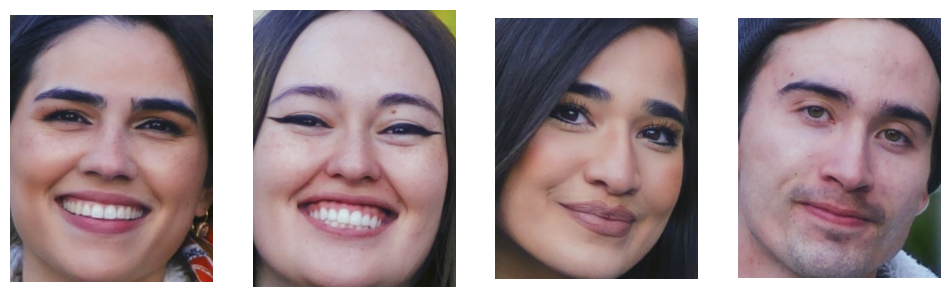

In [ ]:
# Initialize variables to keep track of the maximum happiness score and its index
max_happiness_score = -1  # Initialize with a negative value
index_of_max_happiness_face = -1

# Iterate through the results
for i, result in enumerate(results):
    try:
        # Extract the happiness score from the result
        happiness_score = result[0]['emotion']['happy']

        # Check if the current happiness score is higher than the maximum
        if happiness_score > max_happiness_score:
            max_happiness_score = happiness_score
            index_of_max_happiness_face = i

    except Exception as e:
        # Handle any errors or missing data
        print(f"Error processing result {i}: {str(e)}")

# 'index_of_max_happiness_face' now contains the index of the face with the maximum happiness score
if index_of_max_happiness_face != -1:
    print(f"The face with the maximum happiness score is at index {index_of_max_happiness_face}")
else:
    print("No happiness scores found in the results")

fig, axs = plt.subplots(1, len(faces_list), figsize=(12, 5))

# Iterate through the faces in 'faces_list'
for i, face in enumerate(faces_list):
    axs[i].imshow(face)
    axs[i].axis('off')  # Turn off axis labels for better visualization

# Display all the stored faces
plt.show()

In [ ]:
import gdown

# Define the Google Drive file ID from the shared link
file_id = '1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF'

# Define the output file path where you want to save the downloaded file
output_file = 'inswapper_128.onnx'

# Construct the direct download link
download_link = f'https://drive.google.com/uc?id={file_id}'

# Use gdown to download the file
gdown.download(download_link, output_file, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF
To: /content/inswapper_128.onnx
100%|██████████| 554M/554M [00:05<00:00, 94.1MB/s]


'inswapper_128.onnx'

In [ ]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx')


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [ ]:
source_face = faces[index_of_max_happiness_face]

In [ ]:
res=new.copy()
for face in faces:
   res = swapper.get(res, face, source_face, paste_back=True)

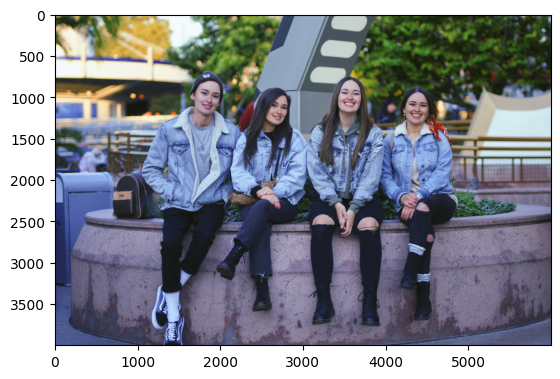

In [ ]:
plt.imshow(res[:,:,::-1])
plt.show()

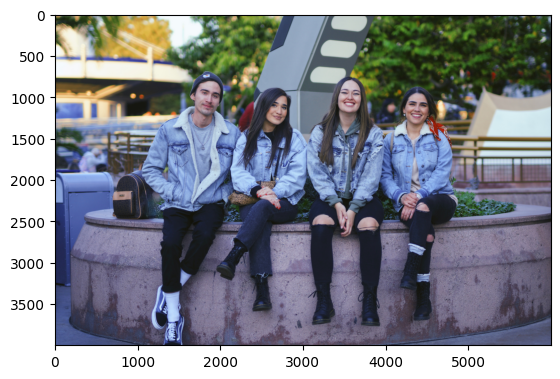

In [ ]:
plt.imshow(new[:,:,::-1])
plt.show()